In [1]:
import pandas as pd
from sodapy import Socrata
import pandas_bokeh as pbk
import seaborn as sns
import numpy as np
pbk.output_notebook()
#import geopandas as gpd


client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=17000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df.head()

Loading BokehJS ...

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_superficie,d_tipus_via,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,tipdia
0,2010,Zona urbana,2010-01-25T23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NA,NA,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,2010-10-31T01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,2010-05-17T15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,2010-08-21T22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NA,NA,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,2010-05-07T17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NA,NA,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div


In [2]:
ap7=df[["via",'f_morts','pk']]
ap7

,via,f_morts,pk
0,SE,0,999999
1,N-240,0,999
2,N-II,1,7087
3,SE,0,999999
4,SE,0,999999
...,...,...,...
16769,SE,0,999999
16770,AP-7,0,173
16771,SE,0,999999
16772,SE,0,999999


In [3]:
#ap7.loc[ap7['via']!='AP-7',['via']]
ap7.set_index('via', inplace = True)
ap7

,f_morts,pk
via,,
SE,0,999999
N-240,0,999
N-II,1,7087
SE,0,999999
SE,0,999999
...,...,...
SE,0,999999
AP-7,0,173
SE,0,999999


In [4]:
ap7 = ap7.loc[["AP-7"]]
ap7

,f_morts,pk
via,,
AP-7,0,138
AP-7,0,996
AP-7,1,1715
AP-7,1,3368
AP-7,1,1175
...,...,...
AP-7,0,1462
AP-7,0,2012
AP-7,0,69


In [5]:
ap7['via'] = ap7.index

In [6]:
ap7

,f_morts,pk,via
via,,,
AP-7,0,138,AP-7
AP-7,0,996,AP-7
AP-7,1,1715,AP-7
AP-7,1,3368,AP-7
AP-7,1,1175,AP-7
...,...,...,...
AP-7,0,1462,AP-7
AP-7,0,2012,AP-7
AP-7,0,69,AP-7


In [7]:
prov = df[["nomdem",'f_morts']]
prov

,nomdem,f_morts
0,Barcelona,0
1,Lleida,0
2,Girona,1
3,Barcelona,0
4,Barcelona,0
...,...,...
16769,Barcelona,0
16770,Barcelona,0
16771,Tarragona,0
16772,Barcelona,0


In [8]:
prov=prov.drop(index=prov[prov['f_morts']== '0'].index)
prov.set_index("nomdem", inplace=True)
prov = prov.reset_index()
prov


,nomdem,f_morts
0,Girona,1
1,Barcelona,1
2,Barcelona,1
3,Barcelona,1
4,Lleida,1
...,...,...
2109,Girona,1
2110,Barcelona,1
2111,Girona,1
2112,Barcelona,1


In [9]:

prov_B = prov.loc[prov['nomdem']=='Barcelona']
prov_G = prov.loc[prov['nomdem']=='Girona']
prov_LL = prov.loc[prov['nomdem']=='Lleida']
prov_T = prov.loc[prov['nomdem']=='Tarragona']

prov_B = prov_B.loc[:, 'f_morts'].sum()
prov_G = prov_G.loc[:, 'f_morts'].sum()
prov_LL = prov_LL.loc[:, 'f_morts'].sum()
prov_T= prov_T.loc[:, 'f_morts'].sum()

def getSum(n):
    
    sum = 0
    for digit in str(n): 
      sum += int(digit)      
    return sum
   

print(getSum(prov_B),getSum(prov_G),getSum(prov_LL),getSum(prov_T))

1113 439 345 441


In [10]:
prov=pd.DataFrame({"any":['Barcelona','Girona','Lleida','Tarragona'],"greus":[1113,439,345,441], 'pob':[5463907,738976,429870,792001]})
prov

,any,greus,pob
0,Barcelona,1113,5463907
1,Girona,439,738976
2,Lleida,345,429870
3,Tarragona,441,792001


In [11]:
prov['Relative'] = (prov['greus']/prov['pob'])*100000
prov

,any,greus,pob,Relative
0,Barcelona,1113,5463907,20.370039
1,Girona,439,738976,59.406530
2,Lleida,345,429870,80.256822
3,Tarragona,441,792001,55.681748


In [12]:
prov = prov.sort_values(by=['Relative'], ascending = False)
prov

,any,greus,pob,Relative
2,Lleida,345,429870,80.256822
1,Girona,439,738976,59.406530
3,Tarragona,441,792001,55.681748
0,Barcelona,1113,5463907,20.370039


In [13]:
prov2 = prov[['any','Relative']]
prov2 = prov2.rename(columns={"any": "Province"})
prov2 = prov2.set_index("Province")

prov2

,Relative
Province,
Lleida,80.256822
Girona,59.406530
Tarragona,55.681748
Barcelona,20.370039


In [14]:
p_bar = prov2.plot_bokeh.bar(
    ylabel="Deaths by 100000 habitants", 
    title="Deaths by 100000 habitants by Province",
    legend = False,
    alpha=0.6)

In [15]:
df['dat'] = df['dat'].str.replace('T',' -')
df[['data','hora']] = df["dat"].str.split(" ", 1, expand=True)
df['data']=df['data'].astype("datetime64")
df["hora"] = df["hora"].str.strip("-")

heat = df[['any','data']]
heat


#ax = sns.heatmap(prov2)
ap7

,f_morts,pk,via
via,,,
AP-7,0,138,AP-7
AP-7,0,996,AP-7
AP-7,1,1715,AP-7
AP-7,1,3368,AP-7
AP-7,1,1175,AP-7
...,...,...,...
AP-7,0,1462,AP-7
AP-7,0,2012,AP-7
AP-7,0,69,AP-7


In [16]:
ap7 = ap7.drop('f_morts',1)
ap7 = ap7.drop('via',1)
ap7 = ap7.reset_index()

<ipython-input-16-db287c817fda>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ap7 = ap7.drop('f_morts',1)
<ipython-input-16-db287c817fda>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ap7 = ap7.drop('via',1)


In [17]:
type(ap7['pk'])
#ax = sns.heatmap(ap7)
ap7['pk'] = ap7['pk'].astype(int)
ap7

ap7['pk']=ap7['pk']/10

In [18]:
ap7
ap7['pk'] = ap7['pk'].astype(int)
ap7['suma'] = ap7['pk'].value_counts()


In [19]:
ap7


,via,pk,suma
0,AP-7,13,5.0
1,AP-7,99,2.0
2,AP-7,171,1.0
3,AP-7,336,2.0
4,AP-7,117,3.0
...,...,...,...
339,AP-7,146,NaN
340,AP-7,201,1.0
341,AP-7,6,NaN
342,AP-7,17,2.0


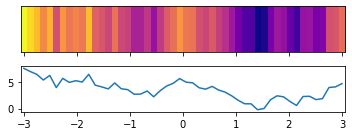

In [20]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

x = np.linspace(-3,3)
y = np.cumsum(np.random.randn(50))+6

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [21]:
ap7

,via,pk,suma
0,AP-7,13,5.0
1,AP-7,99,2.0
2,AP-7,171,1.0
3,AP-7,336,2.0
4,AP-7,117,3.0
...,...,...,...
339,AP-7,146,NaN
340,AP-7,201,1.0
341,AP-7,6,NaN
342,AP-7,17,2.0


In [22]:
ap8 =  df[['pk']]

In [23]:
anys= df[['data']]

anys

,data
0,2010-01-25
1,2010-10-31
2,2010-05-17
3,2010-08-21
4,2010-05-07
...,...
16769,2018-11-20
16770,2018-12-03
16771,2018-09-30
16772,2018-04-04


In [24]:
anys = anys.set_index(anys['data'])
anys = anys.groupby([(anys.index.year),(anys.index.month)]).count()


In [25]:
anys = anys.unstack()

In [26]:
anys

data                                                       
data   1    2    3    4    5    6    7    8    9    10   11   12
data                                                            
2010  152  151  164  147  167  174  221  141  155  186  182  144
2011  143  134  161  150  167  148  161  169  173  178  167  117
2012  150  127  175  156  190  171  190  177  150  171  148  145
2013  157  110  131  153  162  166  186  141  163  201  160  172
2014  135  129  133  176  185  179  161  169  158  184  165  138
2015  130  140  139  146  184  206  181  163  159  155  160  138
2016  132  128  138  155  162  166  179  153  147  161  128  144
2017  113  125  150  151  172  160  158  134  127  156  160  113
2018  137  133  139  122  146  174  176  137  150  148  144  139

<AxesSubplot:xlabel='None-data', ylabel='data'>

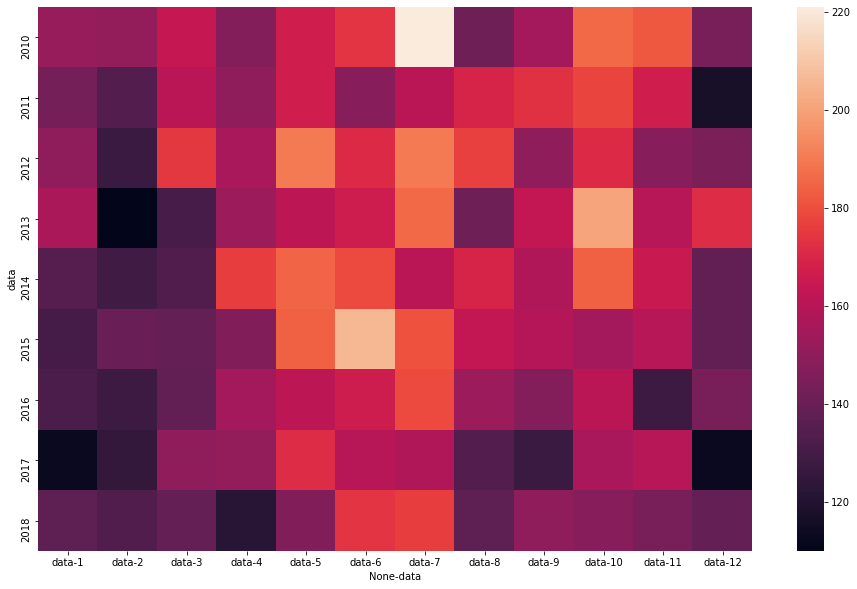

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(anys)